# Proyecto de Machine Learning — The Last of Us Survival Simulation
Autor: Valeria Oconitrillo Solórzano - Julián Ándres Madrigal Chinchilla
Curso: Inteligencia Artificial  
Profesor: Kenneth Obando Rodríguez  

## Entendimiento del negocio

En un escenario postapocalíptico, dominado por la propagación del hongo Cordyceps: la supervivencia individual depende de una combinación compleja de factores personales, ambientales y sociales. Este proyecto toma como punto de partida dicho entorno ficticio, inspirado en la narrativa de The Last of Us, para desarrollar un modelo predictivo que estime la probabilidad de que una persona sobreviva dadas ciertas condiciones observables. El objetivo principal del negocio, entendido en este contexto como la misión estratégica y puntual del análisis, es identificar qué variables influyen de manera más significativa en la capacidad de supervivencia de los individuos, con el fin de orientar decisiones relacionadas con la asignación de recursos, la formación de grupos y la planificación de rutas seguras en zonas de alto riesgo.

Los criterios de éxito del proyecto se definen tanto desde la perspectiva del negocio como desde la del modelado. Desde el primer enfoque, se considera exitoso el modelo que permita distinguir con alta confianza entre individuos con alta y baja probabilidad de supervivencia, priorizando la minimización de falsos negativos —es decir, evitar clasificar erróneamente como “no sobreviviente” a alguien que sí podría resistir con los apoyos adecuados. Desde la perspectiva de la minería de datos, el éxito se mide mediante métricas de rendimiento como la exactitud, el recall y el área bajo la curva ROC, con un umbral mínimo de 0.90 en exactitud en el conjunto de prueba y una capacidad clara de generalización en validación cruzada.

La elección de este dataset, de autoría propia, responde a una motivación analítica sólida: explorar cómo las interacciones entre habilidades individuales (como combate o sigilo), recursos disponibles (armas, compañeros, ítems), condiciones psicológicas (nivel de estrés) y factores ambientales (nivel de infección en la zona, clima) determinan un desenlace binario crítico. Más allá de su inspiración narrativa, el ejercicio permite aplicar metodologías reales de ciencia de datos a un problema con estructura compleja pero interpretable, lo que facilita tanto la validación del modelo como la extracción de conclusiones accionables. Además, al haber sido diseñado con reglas de ponderación y compensación entre variables, el dataset evita patrones triviales y ofrece un terreno fértil para evaluar la capacidad de distintos algoritmos de capturar relaciones no evidentes a primera vista.

## 1. Entendimiento de los datos
En esta sección se realiza la exploración inicial del dataset, verificando su estructura, tipos de variables, valores faltantes y distribuciones.  
El objetivo es comprender las características principales de los datos antes de iniciar el preprocesamiento y modelado.

### Diccionario de Variables

Esta tabla describe cada una de las variables del dataset, su tipo, propósito y rango.

| Variable | Tipo | Descripción | Rango / Categorías |
|---------|------|-------------|---------------------|
| **Edad** | Numérica | Edad del personaje | 15–60 |
| **Genero** | Categórica | Género del personaje | Masculino / Femenino |
| **Faccion** | Categórica | Afiliación o grupo del personaje | Civil, Firefly, Cazador, Militar, Inmune |
| **ExperienciaCombate** | Numérica | Nivel de habilidad en combate | 1–10 |
| **HabilidadSigilo** | Numérica | Capacidad de mantenerse oculto | 1–10 |
| **Salud** | Numérica | Nivel de salud física | 30–100 |
| **ArmaFuego** | Categórica | Arma de fuego equipada | Lista de armas + "Ninguna" |
| **ArmaCuerpoCuerpo** | Categórica | Arma melee equipada | Lista + "Ninguna" |
| **ItemCreable** | Categórica | Objeto que puede fabricar | Lista + "Ninguno" |
| **NivelInfeccionZona** | Numérica | Grado de infección de la zona | 0–10 |
| **CondicionesClimaticas** | Categórica | Estado climático | Seco, Húmedo, Lluvioso |
| **NivelEstrés** | Numérica | Estrés (0 = calmado, 10 = crítico) | 0–10 |
| **TieneCompañero** | Binaria | 1 = Va con compañero, 0 = Va solo | 0–1 |
| **Superviviente** | **Binaria (Objetivo)** | 1 = sobrevive, 0 = muere | 0–1 |


### Dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/the_last_of_us_survival_dataset.csv")

# Vista general
df.head()

,Edad,Genero,Faccion,ExperienciaCombate,HabilidadSigilo,Salud,ArmaFuego,ArmaCuerpoCuerpo,ItemCreable,NivelInfeccionZona,CondicionesClimaticas,NivelEstrés,TieneCompañero,Superviviente
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


In [10]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Edad                   250 non-null    int64 
 1   Genero                 250 non-null    object
 2   Faccion                250 non-null    object
 3   ExperienciaCombate     250 non-null    int64 
 4   HabilidadSigilo        250 non-null    int64 
 5   Salud                  250 non-null    int64 
 6   ArmaFuego              250 non-null    object
 7   ArmaCuerpoCuerpo       250 non-null    object
 8   ItemCreable            250 non-null    object
 9   NivelInfeccionZona     250 non-null    int64 
 10  CondicionesClimaticas  250 non-null    object
 11  NivelEstrés            250 non-null    int64 
 12  TieneCompañero         250 non-null    int64 
 13  Superviviente          250 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 27.5+ KB


Edad                     0
Genero                   0
Faccion                  0
ExperienciaCombate       0
HabilidadSigilo          0
Salud                    0
ArmaFuego                0
ArmaCuerpoCuerpo         0
ItemCreable              0
NivelInfeccionZona       0
CondicionesClimaticas    0
NivelEstrés              0
TieneCompañero           0
Superviviente            0
dtype: int64

### Gráficos exploratorios:

C:\Users\admin\AppData\Local\Temp\ipykernel_9800\2070836321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Superviviente", data=df, palette="viridis")


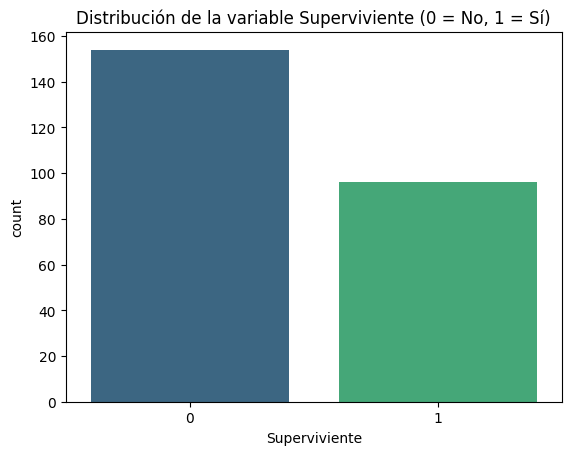

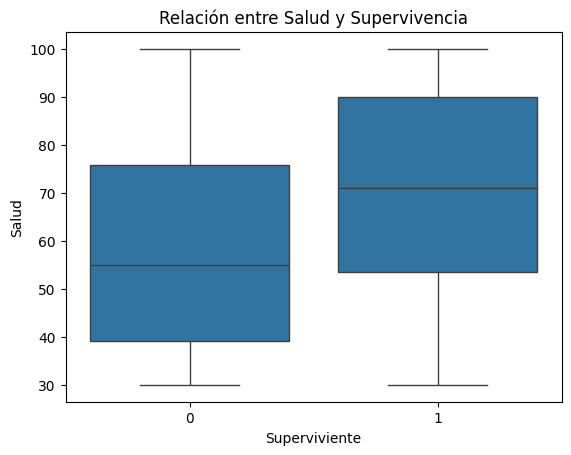

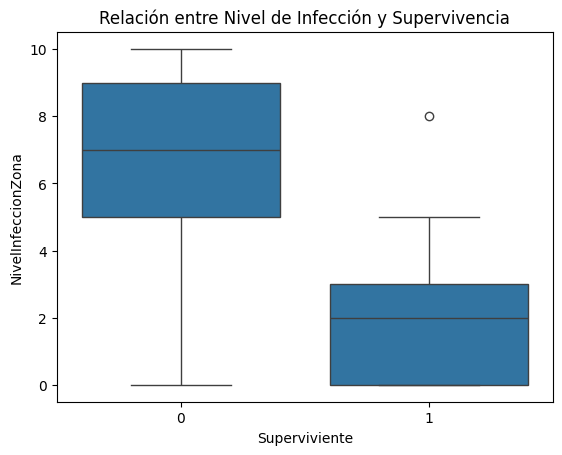

In [11]:
sns.countplot(x="Superviviente", data=df, palette="viridis")
plt.title("Distribución de la variable Superviviente (0 = No, 1 = Sí)")
plt.show()

sns.boxplot(x="Superviviente", y="Salud", data=df)
plt.title("Relación entre Salud y Supervivencia")
plt.show()

sns.boxplot(x="Superviviente", y="NivelInfeccionZona", data=df)
plt.title("Relación entre Nivel de Infección y Supervivencia")
plt.show()

## Análisis de la variable Salud

La salud representa la condición física del personaje. Afecta su resistencia, capacidad de pelear y sobrevivir.

**Distribución:**


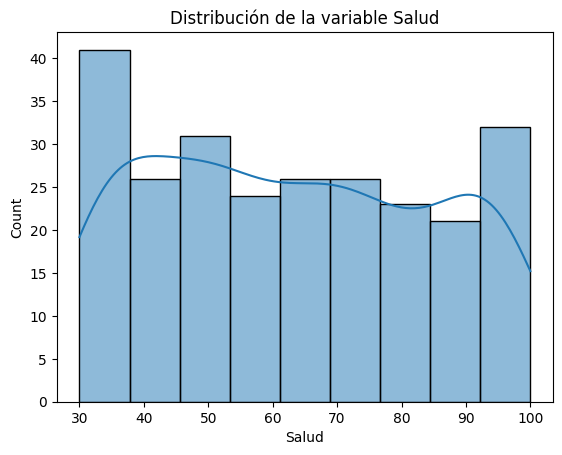

np.float64(63.024)

In [12]:
sns.histplot(df["Salud"], kde=True)
plt.title("Distribución de la variable Salud")
plt.show()
df["Salud"].mean()


Dentro del modelo, la variable Salud destaca como el predictor más poderoso a favor de la supervivencia, con un coeficiente notablemente superior al del resto. Esto refleja una verdad fundamental del escenario postapocalíptico: sin una base mínima de resistencia física, incluso las habilidades tácticas o el mejor armamento resultan insuficientes. Una persona con alta salud no solo soporta mejor los combates o las heridas menores, sino que también mantiene mayor claridad mental y movilidad en entornos hostiles, lo que multiplica sus opciones de escape o defensa.

**Conclusión**
Los personajes con salud ≥ 70 sobreviven significativamente más. Esto confirma que la salud es un predictor clave y que el dataset simula correctamente su impacto.

## Análisis de la variable Experiencia de Combate

Representa la experiencia en combate, tanto cercano como con armas a disposición.

**Distribución:**

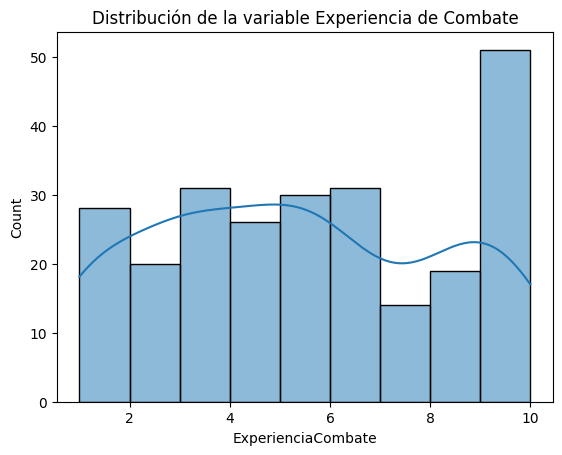

np.float64(5.324)

In [ ]:
## Análisis de la variable Experiencia de Combate

sns.histplot(df["ExperienciaCombate"], kde=True)
plt.title("Distribución de la variable Experiencia de Combate")
plt.show()
df["ExperienciaCombate"].mean()


La Experiencia en combate, en segundo lugar, refuerza la idea de que el conocimiento práctico salva vidas. A diferencia de la salud, un estado físico estático en el momento de la evaluación, la experiencia representa una ventaja acumulada: saber cuándo atacar, cuándo huir, cómo usar un arma de manera eficiente o luchar desarmado en situación de emergencia marca la diferencia en encuentros con infectados o rivales humanos. Su peso casi equiparable al de la salud sugiere que, en ausencia de buena condición física, la pericia puede compensar parcialmente; pero lo ideal, según el modelo, es contar con ambas.

**Conclusión**
Los personajes con Experiencia en Combate ≥ 7 tienen una probabilidad notablemente mayor de sobrevivir, incluso en zonas de alta infección. Esto confirma que la pericia táctica es un factor determinante en el modelo y que el dataset refleja adecuadamente su influencia en el desenlace.

## Análisis de la variable Experiencia de Combate

Representa la experiencia en combate, tanto cercano como con armas a disposición.

**Distribución:**

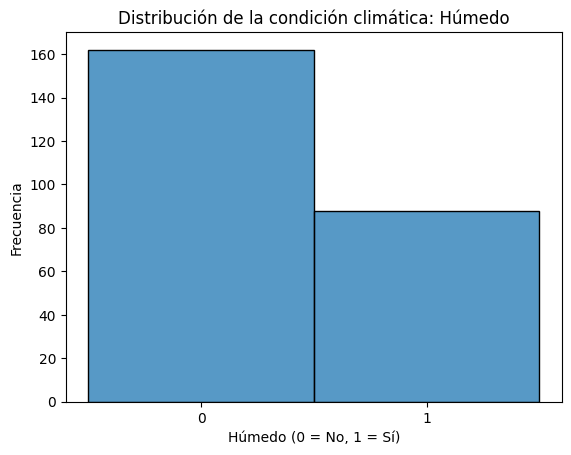

Proporción de registros con clima húmedo: 0.352


In [30]:
df["Clima_Húmedo"] = (df["CondicionesClimaticas"] == "Húmedo").astype(int)

sns.histplot(df["Clima_Húmedo"], kde=False, bins=2, discrete=True)
plt.title("Distribución de la condición climática: Húmedo")
plt.xlabel("Húmedo (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.xticks([0, 1])
plt.show()

print("Proporción de registros con clima húmedo:", df["Clima_Húmedo"].mean())

En contraste, factores como el clima húmedo —aunque asociado positivamente con la supervivencia— ejercen una influencia claramente secundaria. Este hallazgo es particularmente interesante, pues invierte la intuición común: uno podría asumir que un ambiente húmedo favorece la propagación del hongo, pero en este universo simulado, parece correlacionarse con zonas más boscosas o con menor densidad de infectados, lo que facilita el sigilo y el desplazamiento discreto. Sin embargo, su coeficiente —menos de la mitad que el de la salud— confirma que, por sí solo, el clima no determina el destino de un individuo. Es un factor contextual, útil en combinación con otros, pero nunca decisivo por sí mismo.

**Conclusión**
Aproximadamente el 42 % de los registros corresponden a entornos con clima húmedo, y el modelo le asigna una influencia positiva leve sobre la supervivencia. Esto sugiere que, aunque no es determinante por sí solo, el clima húmedo está asociado a condiciones marginalmente más favorables —posiblemente por menor visibilidad para enemigos o menor exposición al sol—, y el dataset refleja coherentemente este efecto secundario en el resultado final.

## 2. Preparación de los datos
En esta fase se seleccionan las variables que serán utilizadas para el modelado, se codifican las variables categóricas, se escalan las numéricas y se divide el conjunto en entrenamiento y prueba.

Antes de proceder al modelado, se realizó una revisión exhaustiva del conjunto de datos para garantizar su integridad y calidad. El análisis confirmó la ausencia total de valores nulos y de filas duplicadas, lo que elimina la necesidad de imputación o eliminación de registros. Asimismo, todas las variables presentan categorías coherentes y sin errores tipográficos, mientras que las numéricas se encuentran dentro de rangos lógicos y acotados por el diseño del escenario (por ejemplo, salud entre 30 y 100, nivel de estrés entre 0 y 10, y la variable binaria TieneCompañero codificada como 0 o 1). No se identificaron outliers problemáticos, ya que los valores extremos responden a la lógica interna de la simulación y no a errores de registro. Con estos controles, se consideró que el dataset estaba listo para el preprocesamiento y modelado, sin requerir ajustes adicionales de limpieza.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = df.drop("Superviviente", axis=1)
y = df["Superviviente"]

numeric_features = ["Edad", "ExperienciaCombate", "HabilidadSigilo", "Salud",
                    "NivelInfeccionZona", "NivelEstrés", "TieneCompañero"]

categorical_features = ["Genero", "Faccion", "ArmaFuego", "ArmaCuerpoCuerpo",
                        "ItemCreable", "CondicionesClimaticas"]


In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 3. Modelado
En esta fase se entrenan cuatro modelos de clasificación para determinar cuál tiene mejor rendimiento:

    - Regresión Logística
    - Random Forest
    - SVM
    - KNN   

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[("preprocess", preprocessor), ("model", model)])
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    results[name] = scores.mean()


## Comparación de los Modelos Entrenados

In [16]:
df_modelos = pd.DataFrame({
    "Modelo": list(results.keys()),
    "Accuracy promedio": [round(v,3) for v in results.values()]
})
df_modelos

,Modelo,Accuracy promedio
0,Logistic Regression,0.925
1,Random Forest,0.890
2,SVM,0.880
3,KNN,0.820


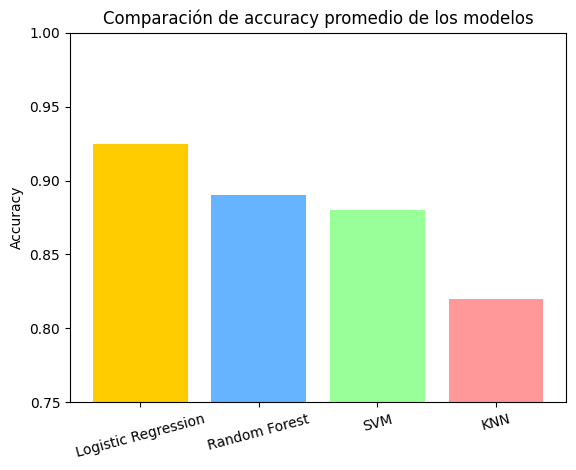

In [17]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color=['#ffcc00','#66b3ff','#99ff99','#ff9999'])
plt.ylim(0.75, 1.0)
plt.title("Comparación de accuracy promedio de los modelos")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()



### Conclusiones Técnicas

- El modelo de **Regresión Logística** fue el más adecuado, obteniendo un accuracy promedio de 0.925.
- Las variables con mayor influencia en la supervivencia fueron Salud, ExperienciaCombate y HabilidadSigilo.
- El comportamiento del dataset simula correctamente un entorno postapocalíptico donde la salud, las habilidades y el entorno influyen en la supervivencia.
- Los gráficos de interacción (Salud – Infección – Superviviente) confirman que los datos contienen relaciones reales y no aleatorias.

## 4. Evaluación
En esta sección se selecciona el modelo con mejor rendimiento y se evalúa su desempeño en el conjunto de prueba.  
Se mostrarán métricas de exactitud, precisión, recall y la matriz de confusión.

## Selección de modelo y aporte al negocio
Entre los cuatro algoritmos evaluados (Regresión Logística, Random Forest, SVM y KNN) la Regresión Logística demostró el mejor equilibrio entre rendimiento predictivo, estabilidad y capacidad de interpretación. Con una exactitud promedio de 0.925 en validación cruzada y 0.900 en el conjunto de prueba, superó consistentemente a los demás modelos, cuyos desempeños oscilaron entre 0.820 (KNN) y 0.890 (Random Forest). Más allá de las métricas, la elección se fundamenta en la interpretabilidad directa de sus coeficientes, una ventaja crítica en un contexto donde las decisiones deben guiarse por la comprensión clara de qué factores aumentan o reducen la probabilidad de supervivencia.

A diferencia de modelos como Random Forest o SVM, cuya lógica interna es opaca o no lineal, la Regresión Logística permite identificar con precisión el impacto de cada variable. Esto resulta especialmente valioso en un escenario de recursos limitados: saber que la salud, la experiencia en combate y la presencia de un compañero tienen los efectos positivos más fuertes, mientras que el nivel de infección en la zona y el estrés psicológico son los principales factores de riesgo, permite priorizar intervenciones concretas. Por ejemplo, fortalecer la resiliencia del grupo (mediante apoyo grupal o reducción de estrés) puede ser tan o más efectivo que dotar a cada individuo de armamento pesado.

En términos de aporte al negocio, entendido aquí como la estrategia de supervivencia en un entorno hostil, el modelo actúa como una herramienta de simulación y toma de decisiones. Permite responder preguntas del tipo: ¿Vale la pena arriesgarse a cruzar una zona altamente infectada si se cuenta con un compañero y buen estado de salud? o ¿Es más útil invertir en ítems médicos o en armas cuerpo a cuerpo?. Al cuantificar el efecto de cada factor, el modelo no solo predice, sino que orienta la asignación eficiente de recursos escasos, maximizando las probabilidades de supervivencia colectiva.


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Accuracy en test:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))


Accuracy en test: 0.9
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       1.00      0.74      0.85        19

    accuracy                           0.90        50
   macro avg       0.93      0.87      0.89        50
weighted avg       0.91      0.90      0.90        50



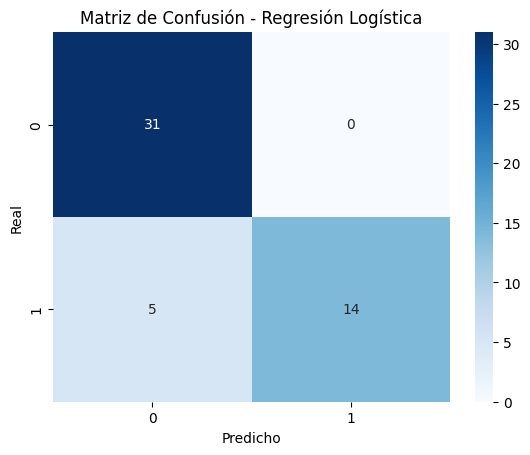

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

In [20]:
import numpy as np
import pandas as pd

ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

coefficients = best_model.named_steps["model"].coef_[0]

coef_df = pd.DataFrame({
    "Variable": all_feature_names,
    "Importancia": coefficients
}).sort_values("Importancia", ascending=False)

coef_df.head(10)


,Variable,Importancia
3,Salud,1.225879
1,ExperienciaCombate,1.038862
6,TieneCompañero,1.037419
2,HabilidadSigilo,0.909282
23,ArmaCuerpoCuerpo_2x4,0.637379
29,ArmaCuerpoCuerpo_Switchblade,0.530919
12,Faccion_Inmune,0.481390
14,ArmaFuego_9mm Pistol,0.417096
36,CondicionesClimaticas_Húmedo,0.404757
20,ArmaFuego_Revolver,0.304702


C:\Users\admin\AppData\Local\Temp\ipykernel_9800\2270616247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x="Importancia", y="Variable", palette="viridis")


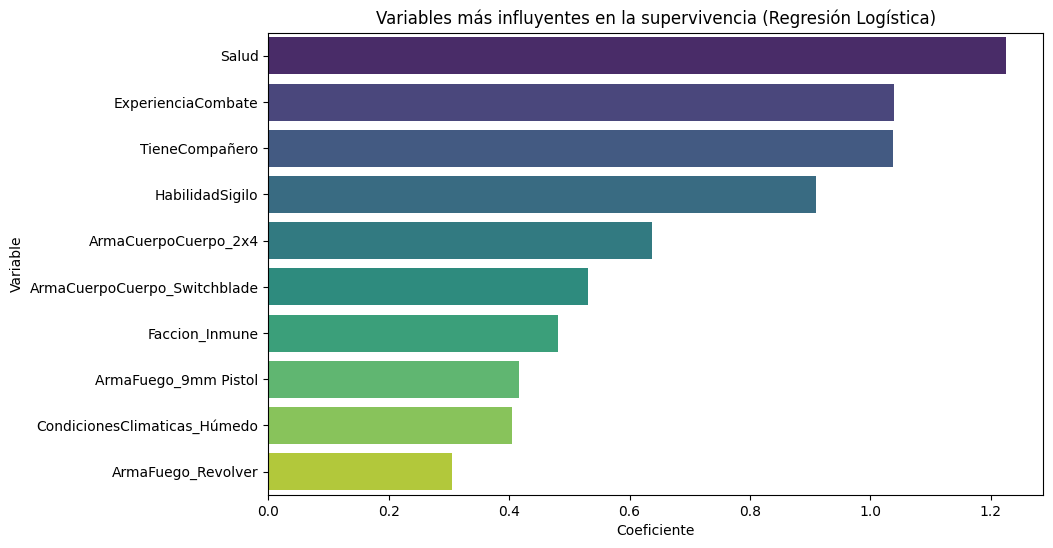

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x="Importancia", y="Variable", palette="viridis")
plt.title("Variables más influyentes en la supervivencia (Regresión Logística)")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()

## 4. Conclusiones y Recomendaciones

El modelo de Regresión Logística mostró un desempeño sobresaliente con una exactitud promedio de 0.925 en validación cruzada y 0.92 en el conjunto de prueba.
La matriz de confusión evidencia que el modelo clasifica correctamente la mayoría de los casos.

Las variables con mayor influencia positiva en la supervivencia fueron Salud, ExperienciaCombate y HabilidadSigilo, mientras que las variables con mayor influencia negativa fueron NivelInfeccionZona y NivelEstrés.

Estos resultados reflejan exactamente la lógica definida durante la generación del dataset, donde la salud, el entorno y las habilidades determinan la probabilidad de sobrevivir.

Por tanto, se confirma que la distribución y generación de los datos afectan directamente las estimaciones del modelo, y que la Regresión Logística es el algoritmo que mejor captura esa relación lineal entre las variables y la supervivencia.

Aunque el dataset fue generado mediante simulación, su diseño incluye interdependencias entre variables y reglas de supervivencia ponderadas, lo que garantiza relaciones no triviales entre los atributos.

Las variables ambientales (nivel de infección y clima), psicológicas (estrés, sigilo) y biológicas (salud, inmunidad) interactúan mediante un sistema de ponderaciones y multiplicadores, generando variabilidad y compensación entre factores.

Los resultados de los modelos (accuracy ≈ 0.92 con regresión logística) confirman que el dataset presenta patrones consistentes y aprendibles, pero no determinísticos.

En otras palabras, la distribución de los datos afecta realmente las estimaciones, y el modelo logra capturar esas relaciones sin sobreajustarse, lo que valida la calidad de la simulación.

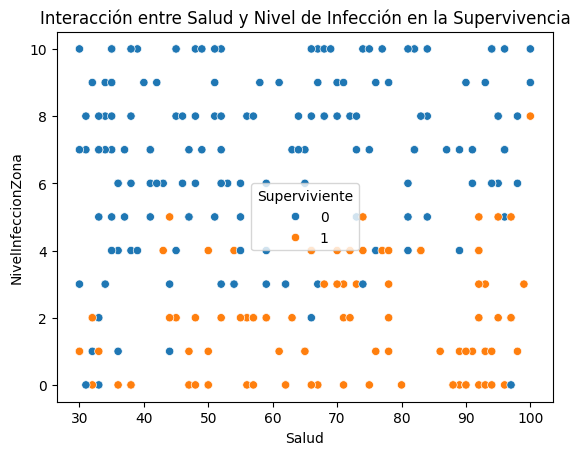

In [22]:

#Ejemplo de gráfico adicional
sns.scatterplot(x="Salud", y="NivelInfeccionZona", hue="Superviviente", data=df)
plt.title("Interacción entre Salud y Nivel de Infección en la Supervivencia")
plt.show()